# Data Cleaning
__"Your model is only as good as the data you give it"__ lays emphasis on why data must be at its best quality before it is used to train a model, hence, data cleaning is an important step to building a good and reliable ML model.
Cleaning image data usually involves cropping the relevant portion of said image and discarding the irrelevant portion.   
If you wish to procure the dataset used to work on this project you can find it [here](https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection)  
__To the code!__

In [1]:
# Import necessary packages.
%matplotlib inline
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread(r"C:/Users/ifunanyaScript/Everything/BrainTumour_DiagnosisApp/data/dataset/tumour/y0.jpg")
image.shape

(348, 287, 3)

In the above tuple, there are y and x dimensions respectively, and the third value represents the RGB colour channel. Each pixel in the image will be represented as an array of three values of RGB accross the entire image, like so __[0, 127, 255]__.

In [3]:
image[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0,

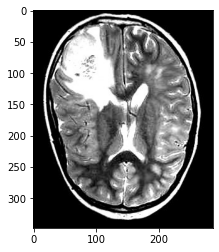

In [4]:
plt.imshow(image)

This is an image of a brain MRI scan.  
For the purpose the prospective model, the relevant portion of the image is the skull containing the brain.  
Apparently there are unnecessary black pixels around the skull. These black spaces would negatively affect the model's performance if not properly addressed. Hence, we need to define a function that can crop this image and get rid of the unnecessary black pixels around the skull.


__NB:__ Black pixels are [0, 0, 0].

In [5]:
def zoomCrop(image):
    """
    First, the function goes through the image array dimension-wise(y, x) and 
    gets the index where the entire y, x dimension is not zero,
    Then, the valid image is cropped using this indices.
    """
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    cropped_image = image[min(y_nonzero):max(y_nonzero), min(x_nonzero):max(x_nonzero)]
    return cropped_image

In [6]:
clean_image = zoomCrop(image)
clean_image.shape

(335, 255, 3)

Clearly the dimension has shrinked.  
Let's plot this image and see the difference.

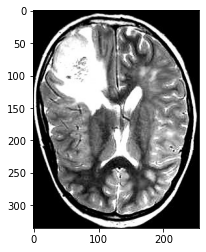

In [7]:
plt.imshow(clean_image)

Let's try this out on some other images.

In [8]:
image2 = cv2.imread(r"C:/Users/ifunanyaScript/Everything/BrainTumour_DiagnosisApp/data/dataset/tumour/y61.jpg")
clean_image2 = zoomCrop(image2)
image3 = cv2.imread(r"C:/Users/ifunanyaScript/Everything/BrainTumour_DiagnosisApp/data/dataset/tumour/y128.jpg")
clean_image3 = zoomCrop(image3)
image4 = cv2.imread(r"C:/Users/ifunanyaScript/Everything/BrainTumour_DiagnosisApp/data/dataset/tumour/y1379.jpg")
clean_image4 = zoomCrop(image4)

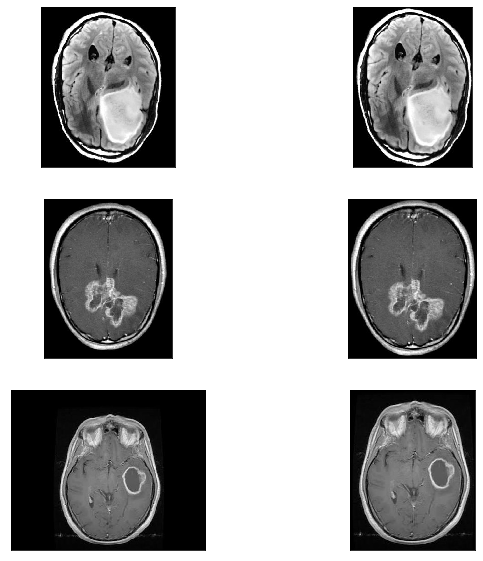

In [9]:
demo = image2, clean_image2, image3, clean_image3, image4, clean_image4
plt.figure(figsize=(10, 10))
for i, c in enumerate(demo):
    ax = plt.subplot(3, 2, i+1)
    ax.imshow(c, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_xticks([])
    ax.set_yticks([])

I'll modify the function such that, it takes a file path as an argument and read the image directly within the function.

In [10]:
def zoomCrop(path):
    image= cv2.imread(path)
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    cropped_image = image[min(y_nonzero):max(y_nonzero), min(x_nonzero):max(x_nonzero)]
    return cropped_image

Voilà, that did the trick! 
Now that we have a function that does quite the trick, we will write a for loop that iterate over the entire dataset, gets the cropped image and saves it in a different folder. 

In [11]:
# Assign the path to the entire dataset and the path to the prospective clean image folder to variables.
dataset_path = r"C:/Users/ifunanyaScript/Everything/BrainTumour_DiagnosisApp/data/dataset/"
clean_dataset_path = r"C:/Users/ifunanyaScript/Everything/BrainTumour_DiagnosisApp/data/clean_dataset/"

In [12]:
# Sub directories of each class.
sub_dirs = []
for entry in os.scandir(dataset_path):
    sub_dirs.append(entry.path)
sub_dirs

['C:/Users/ifunanyaScript/Everything/BrainTumour_DiagnosisApp/data/dataset/no_tumour',
 'C:/Users/ifunanyaScript/Everything/BrainTumour_DiagnosisApp/data/dataset/tumour']

In [13]:
# Delete the folder if it already exists.
if os.path.exists(clean_dataset_path):
    shutil.rmtree(clean_dataset_path)
    
# Create the new folder
os.makedirs(clean_dataset_path)

In [ ]:
# Iterate through the directories in sub_dirs,
# Get the cropped image from the original image,
# Then save the cropped image in a new directory.
clean_image_dirs = []
for sub_dir in sub_dirs:
    file_count = 1
    class_name = sub_dir.split("/")[-1]
    print(class_name)
    
    for entry in os.scandir(sub_dir):
        # Get the cropped image.
        crop = zoomCrop(entry.path)
        # Effectively ignore None images to avoid error.
        if crop is not None:
            # New directory to hold clean images for each class.
            clean_image_dir = clean_dataset_path + class_name
            if not os.path.exists(clean_image_dir):
                os.makedirs(clean_image_dir)
                clean_image_dirs.append(clean_image_dir)
                print(f"Processing clean images in: {clean_image_dir} \n")
            clean_image_filename = class_name + str(file_count) + ".jpg"
            clean_image_path = clean_image_dir + "/" + clean_image_filename
            
            # Write the clean image to the path on the system.
            cv2.imwrite(clean_image_path, crop)
            file_count += 1

no_tumour
Processing clean images in: C:/Users/ifunanyaScript/Everything/BrainTumour_DiagnosisApp/data/clean_dataset/no_tumour 

tumour
Processing clean images in: C:/Users/ifunanyaScript/Everything/BrainTumour_DiagnosisApp/data/clean_dataset/tumour 



__NB:__ Usually, automated approaches 